### **Assignment 2**

***Part -1***
1. Use OpenCV or any other library for input pipeline (transformations, augmentations,
rotation, etc..)

2. Only quadratic intensity scaling
(Using erode/dilate for noise removal leads to drop in accuracy)

***Part -2***

1. Build a CNN network from scratch using tensorflow on transformed data, Save model
with highest validation accuracy & use that saved model for inference.

**Part -3**

1. Modify the above architecture by using Batch normalisation, dropout,
ReduceLRonPlateau, Early stopping.
2.Introduce batch normalization, dropout and build a model using Batch norm on
tensorflow
(batch-normalization paper)

Compare the performance of the 2 models ( Part 2 and Part 3)

# **Steps followed to meet the above requirments:**


1.   Loading Dataset
2.   Pre-processing of data
3.   Model Architecture
4.   Compile and fit the model1 to training data
5.   Testing the model1 performance bold text






# **1. Loading the dataset**

In [3]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from matplotlib import figure
import cv2
from sklearn.utils import shuffle
import seaborn as sn
import random
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping



In [4]:
#fashion dataset
(train_images,train_labels),(test_images,test_labels)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#the shape of training and testing data
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
#Number of classes
pd.DataFrame(train_labels).nunique()

0    10
dtype: int64

In [55]:
#Classes Names
classes={0: "T-shirt/top",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle boot"}

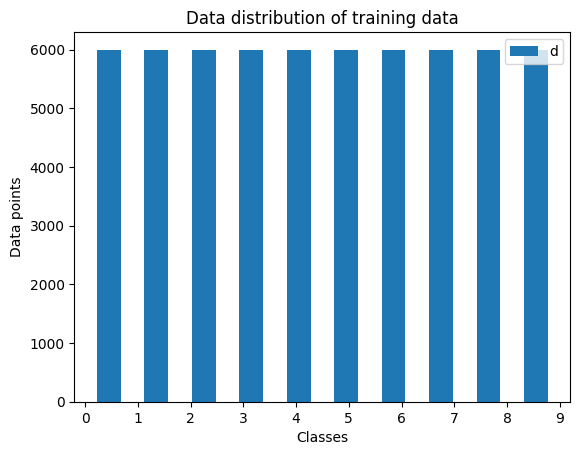

In [ ]:
#data distribution of each class(Training data)
plt.hist(list(train_labels),bins=10,rwidth=0.5)
plt.xticks(range(10),labels=list(classes.keys()))
plt.xlabel("Classes")
plt.ylabel("Data points")
plt.legend("data",)
plt.title("Data distribution of training data")
plt.show()

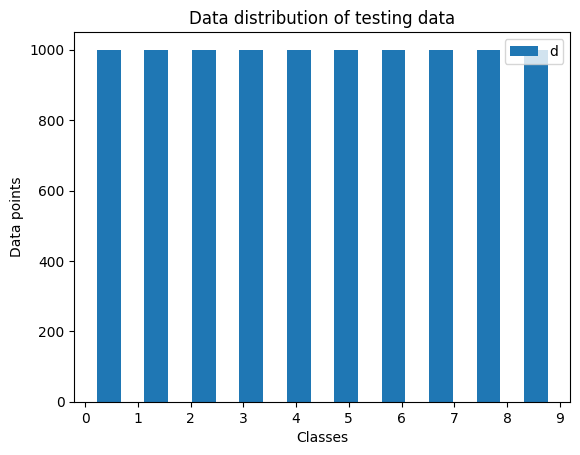

In [ ]:
#data distribution of each class(Testing data)
plt.hist(list(test_labels),bins=10,rwidth=0.5)
plt.xticks(range(10),labels=list(classes.keys()))
plt.xlabel("Classes")
plt.ylabel("Data points")
plt.legend("data",)
plt.title("Data distribution of testing data")
plt.show()

## **2. Pre-processing of Data**

In [5]:
# Scaling the training and testing data
train_images_flattened=train_images/255.0
test_images_flattened=test_images/255.0

Text(0.5, 0.98, 'Cloting Images')

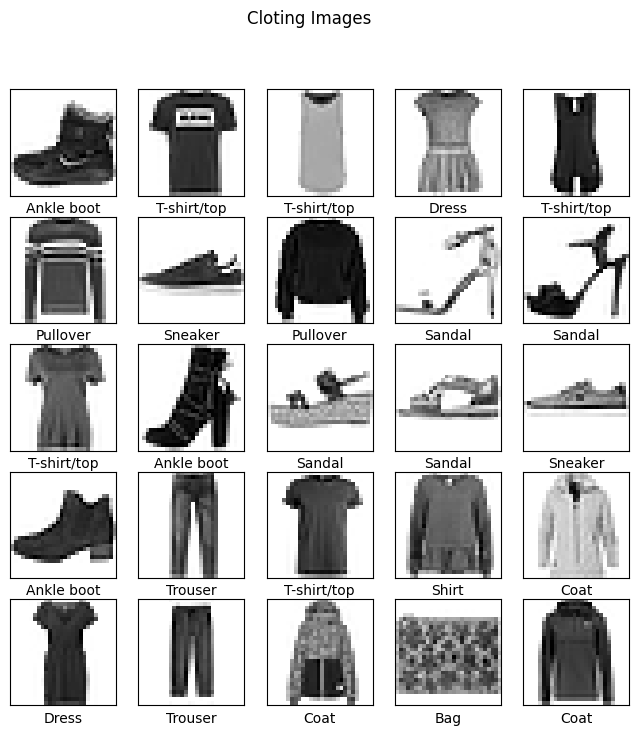

In [ ]:
#Displaying the first 25 training images
fig=plt.figure(figsize=(8,8))
for i in range(25):
  fig.add_subplot(5,5,i+1)
  plt.imshow(train_images_flattened[i],cmap=plt.cm.binary)
  plt.xlabel(classes[train_labels[i]])
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
fig.suptitle("Cloting Images")

In [6]:
#one-hot encoding
train_labels_categorial=keras.utils.to_categorical(train_labels,num_classes=10, dtype="float32")
test_labels_categorial=keras.utils.to_categorical(test_labels,num_classes=10, dtype="float32")

# 3. Model Architecture

**model1- CNN network from scratch using tensorflow**

In [ ]:
#model1: this is the model trained on the scaled training dataset
model1=keras.Sequential([keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",strides=(1,1),input_shape=(28,28,1),activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dense(56,activation='relu'),
                         keras.layers.Dense(10,activation='softmax')])

In [ ]:
#model1 summary
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_21 (Dense)            (None, 128)              

# 4. **Compile and fit the model1 to training data**

In [ ]:
#Here the model1 is compiled for training. Adam optimizer efficient on larger dataset.
#As we are solving a multi-class image classification, we use categorical_crossentropy.
#And then the model1 if fit to the training data where 10% of that data is used for validation.
#tensorboard is also used to see the loss and accuracy in much better way.
tb_callbacks=keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
model1.compile(optimizer='SGD',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_images_flattened,train_labels_categorial,epochs=10,validation_split=0.1,callbacks=[tb_callbacks])

Epoch 1/20
1688/1688 [==============================] - 109s 64ms/step - loss: 0.8146 - accuracy: 0.7089 - val_loss: 0.5709 - val_accuracy: 0.7912
Epoch 2/20
1688/1688 [==============================] - 104s 62ms/step - loss: 0.4954 - accuracy: 0.8179 - val_loss: 0.4576 - val_accuracy: 0.8332
Epoch 3/20
1688/1688 [==============================] - 104s 62ms/step - loss: 0.4227 - accuracy: 0.8463 - val_loss: 0.3946 - val_accuracy: 0.8550
Epoch 4/20
1688/1688 [==============================] - 76s 45ms/step - loss: 0.3810 - accuracy: 0.8622 - val_loss: 0.3942 - val_accuracy: 0.8533
Epoch 5/20
1688/1688 [==============================] - 78s 46ms/step - loss: 0.3538 - accuracy: 0.8731 - val_loss: 0.4104 - val_accuracy: 0.8473
Epoch 6/20
1688/1688 [==============================] - 77s 46ms/step - loss: 0.3335 - accuracy: 0.8790 - val_loss: 0.3532 - val_accuracy: 0.8695
Epoch 7/20
1688/1688 [==============================] - 79s 47ms/step - loss: 0.3157 - accuracy: 0.8855 - val_loss: 0.333

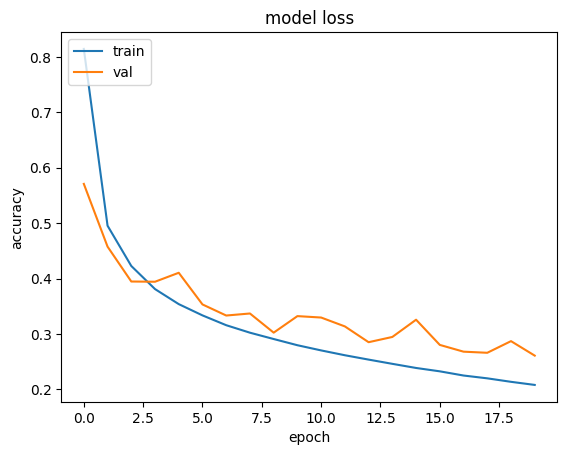

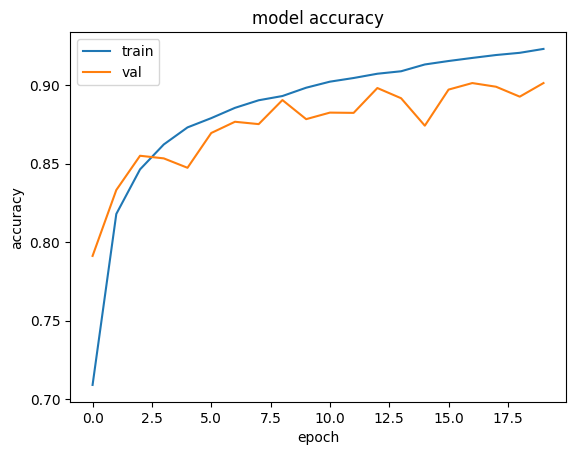

In [ ]:
#The model accuracy and loss for training and validation data
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **5. Testing the model1 performance**

In [ ]:
#accuracy on testing data
model1.evaluate(test_images_flattened,test_labels_categorial)

313/313 [==============================] - 7s 22ms/step - loss: 0.2766 - accuracy: 0.9000


[0.27658921480178833, 0.8999999761581421]

In [ ]:
y_pred=model1.predict(test_images_flattened)

313/313 [==============================] - 6s 19ms/step


Text(0.5, 0.98, 'Cloting Images')

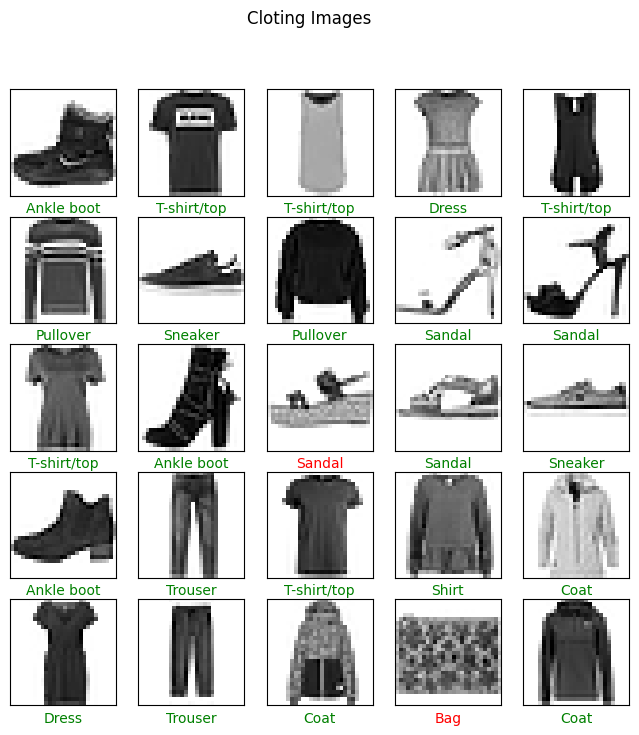

In [ ]:
#Displaying the first 25 test images along with predictions
fig=plt.figure(figsize=(8,8))
for i in range(25):
  fig.add_subplot(5,5,i+1)
  plt.imshow(train_images_flattened[i],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  true=classes[np.argmax(test_labels_categorial[i])]
  predict=classes[np.argmax(y_pred[i])]
  if true==predict:#if the prediction is right then print the label in green else in red
    plt.xlabel(classes[train_labels[i]],color='green')
  else:
    plt.xlabel(classes[train_labels[i]],color='red')
fig.suptitle("Cloting Images")

In [ ]:
y_pred_model1_label=[np.argmax(i) for i in y_pred]

Text(95.72222222222221, 0.5, 'Predict')

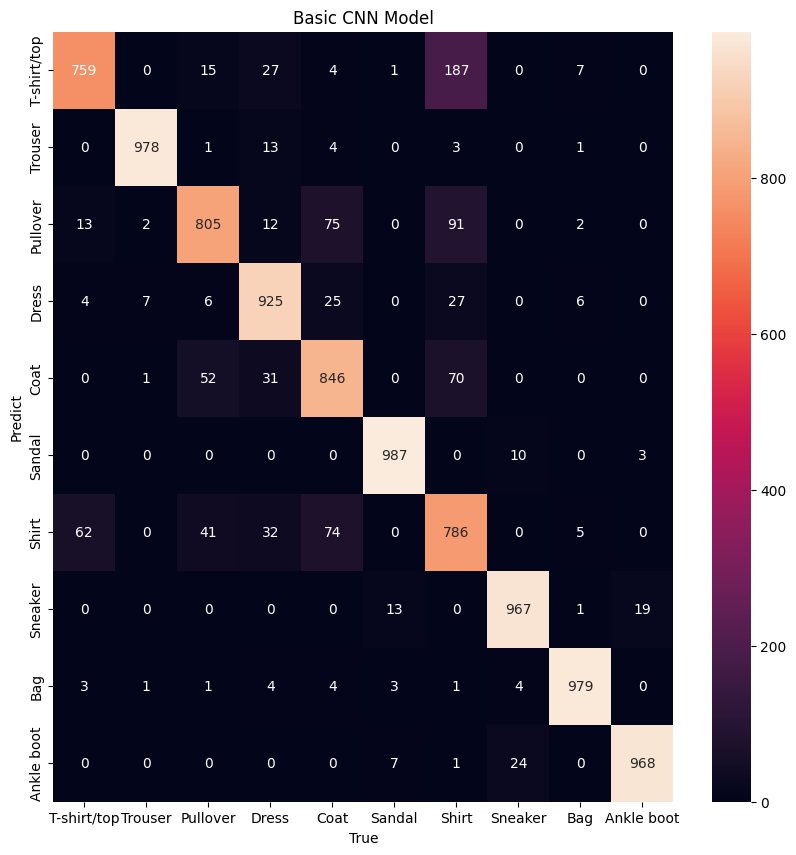

In [ ]:
#most of the shirts predicted as T-shirt/top,pullover,coat,dress.
#most of the t-shirt/top predicted as shirt.
#most of the coat predicted as pullover,shirt,dress.
#most of the ankle boot predicted as sneakers,sandal.
#most of the sandal predicted as sneaker.
test_categorial_label=[np.argmax(i) for i in test_labels_categorial]
cm2=tf.math.confusion_matrix(test_categorial_label,y_pred_model1_label)
plt.figure(figsize=(10,10))
ax1=sn.heatmap(cm2,annot=True,fmt='g')
ax1.set_xticklabels(list(classes.values()))
ax1.set_yticklabels(list(classes.values()))
plt.title("Basic CNN Model")
plt.xlabel("True")
plt.ylabel("Predict")

## **PART 1 input pipeline using OpenCV (Data Augmentation)**

## **Checking if data augmentation and transformations help in increasing the efficiency**

In [7]:
#the below functions are written for data augmentation using Opencv
def apply_augmentation(image):
    augmentation_functions = [flip_horizontally, flip_vertically, rotate]
    random.shuffle(augmentation_functions)

    augmented_image = image.copy()
    for augmentation_func in augmentation_functions:
        augmented_image = augmentation_func(augmented_image)

    return augmented_image

def flip_horizontally(image):
    return cv2.flip(image, 1)

def flip_vertically(image):
    return cv2.flip(image, 0)

def rotate(image):
    rows, cols= image.shape
    angle = random.randint(-30, 30)
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))


In [8]:
#Function that augments the data and returns augmented data stacked with the original data
def augmentation(data,label):
  new_width=28
  new_height=28
  augmented_images=[]
  labels=[]
  for i in range(data.shape[0]):
    augmented_image=cv2.resize(apply_augmentation(data[i]),(new_width, new_height))
    augmented_images.append(augmented_image/255.0)
    labels.append(label[i])

  data=np.vstack((data,augmented_images))
  label=np.vstack((label,labels))
  return data, label

In [9]:
#Apply data augmentation on tarining and testing data
#train_images_falttened_transform, train_labels_categorial_transform, test_images_flattened_transform,
#test_labels_categorial_transform are the random mix for both transformed data and original data
train_images_flattened_transform, train_labels_categorial_transform=augmentation(train_images_flattened,train_labels_categorial)
train_images_flattened_transform, train_labels_categorial_transform = shuffle(train_images_flattened_transform, train_labels_categorial_transform, random_state=0)
test_images_flattened_transform, test_labels_categorial_transform=augmentation(test_images_flattened,test_labels_categorial)
test_images_flattened_transform, test_labels_categorial_transform = shuffle(test_images_flattened_transform, test_labels_categorial_transform, random_state=0)

In [51]:
#going to avoid this step as it has reduced the accuracy very badly
'''
#eroded the boundaries in training and testing data
train_images_flattened_noise=[]
test_images_flattened_noise=[]
def eroded(data):
  kernel = np.ones(((3,3)), np.uint8)
  return cv2.erode(data, kernel, iterations=1)
for i in range(train_images_flattened_transform.shape[0]):
  train_images_flattened_transform[i]=list(eroded(train_images_flattened_transform[i]))
for i in range(test_images_flattened_transform.shape[0]):
  test_images_flattened_transform[i]=list(eroded(test_images_flattened_transform[i]))'''

'\n#eroded the boundaries in training and testing data\ntrain_images_flattened_noise=[]\ntest_images_flattened_noise=[]\ndef eroded(data):\n  kernel = np.ones(((3,3)), np.uint8)\n  return cv2.erode(data, kernel, iterations=1)\nfor i in range(train_images_flattened_transform.shape[0]):\n  train_images_flattened_transform[i]=list(eroded(train_images_flattened_transform[i]))\nfor i in range(test_images_flattened_transform.shape[0]):\n  test_images_flattened_transform[i]=list(eroded(test_images_flattened_transform[i]))'

In [11]:
(train_images_flattened_transform.shape,test_images_flattened_transform.shape)

((120000, 28, 28), (20000, 28, 28))

Part2: CNN model for the transfored data.
The model1 is trained on the augmented data and tested to see how well it works.

In [149]:
#Here the model1 is compiled for training.Adam optimizer efficient on larger dataset.
#As we are solving a multi-class image classification, we use categorical_crossentropy.
#And then the model1 if fit to the training data where 10% of that data is used for validation.
model1.compile(optimizer='SGD',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_images_flattened_transform,train_labels_categorial_transform,epochs=8,batch_size=20,validation_split=0.1)

Epoch 1/8
5400/5400 [==============================] - 164s 30ms/step - loss: 0.8423 - accuracy: 0.6803 - val_loss: 0.5476 - val_accuracy: 0.8059
Epoch 2/8
5400/5400 [==============================] - 162s 30ms/step - loss: 0.4595 - accuracy: 0.8300 - val_loss: 0.5247 - val_accuracy: 0.8169
Epoch 3/8
5400/5400 [==============================] - 164s 30ms/step - loss: 0.4433 - accuracy: 0.8359 - val_loss: 0.5231 - val_accuracy: 0.8191
Epoch 4/8
5400/5400 [==============================] - 162s 30ms/step - loss: 0.4306 - accuracy: 0.8401 - val_loss: 0.5107 - val_accuracy: 0.8240
Epoch 5/8
5400/5400 [==============================] - 166s 31ms/step - loss: 0.4294 - accuracy: 0.8411 - val_loss: 0.5211 - val_accuracy: 0.8232
Epoch 6/8
5400/5400 [==============================] - 166s 31ms/step - loss: 0.4138 - accuracy: 0.8455 - val_loss: 0.5017 - val_accuracy: 0.8296
Epoch 7/8
5400/5400 [==============================] - 165s 31ms/step - loss: 0.4206 - accuracy: 0.8439 - val_loss: 0.5204 -

In [150]:
#model evaluation
model1.evaluate(test_images_flattened_transform,test_labels_categorial_transform)

625/625 [==============================] - 10s 16ms/step - loss: 0.5127 - accuracy: 0.8244


[0.512709379196167, 0.824400007724762]

In [151]:
y_pred=model1.predict(test_images_flattened_transform)

625/625 [==============================] - 9s 14ms/step


Text(0.5, 0.98, 'Cloting Images')

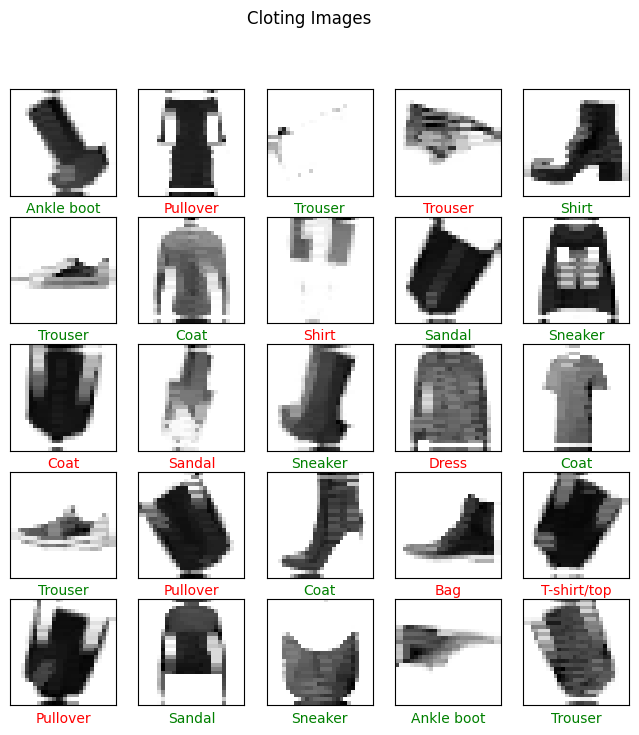

In [152]:
#ploting the first 25 images of test data
fig=plt.figure(figsize=(8,8))
for i in range(25):
  fig.add_subplot(5,5,i+1)
  plt.imshow(test_images_flattened_transform[i],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  true=classes[np.argmax(test_labels_categorial_transform[i])]
  predict=classes[np.argmax(y_pred[i])]
  if true==predict:#if the prediction is right then print the label in green else in red
    plt.xlabel(classes[test_labels[i]],color='green')
  else:
    plt.xlabel(classes[test_labels[i]],color='red')
fig.suptitle("Cloting Images")

# **The accuracy has reduced when augmented data used to train the model. So to increase the accuracy, we perform hyperparameters tuning.**

## **Hyperparameter tuning of neural networks**


<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>






### **<ol>1. Change activation function of hidden layer</ol>**



In [164]:
#model: this model is used to train on the transformed data
model1=keras.Sequential([keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",strides=(1,1),input_shape=(28,28,1),activation='leaky_relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128,activation='leaky_relu'),
                         keras.layers.Dense(56,activation='leaky_relu'),
                         keras.layers.Dense(10,activation='softmax')])

In [165]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dense_27 (Dense)            (None, 128)              

In [166]:
model1.compile(optimizer='SGD',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_images_flattened_transform,train_labels_categorial_transform,epochs=10,batch_size=20,validation_split=0.1)

Epoch 1/10
5400/5400 [==============================] - 177s 33ms/step - loss: 1.5154 - accuracy: 0.4235 - val_loss: 1.4463 - val_accuracy: 0.4391
Epoch 2/10
5400/5400 [==============================] - 180s 33ms/step - loss: 1.3692 - accuracy: 0.4867 - val_loss: 1.3549 - val_accuracy: 0.5029
Epoch 3/10
5400/5400 [==============================] - 213s 39ms/step - loss: 1.3222 - accuracy: 0.5213 - val_loss: 1.3007 - val_accuracy: 0.4949
Epoch 4/10
5400/5400 [==============================] - 288s 53ms/step - loss: 1.1487 - accuracy: 0.5916 - val_loss: 0.9371 - val_accuracy: 0.6901
Epoch 5/10
5400/5400 [==============================] - 196s 36ms/step - loss: 0.8148 - accuracy: 0.7021 - val_loss: 0.7135 - val_accuracy: 0.7459
Epoch 6/10
5400/5400 [==============================] - 179s 33ms/step - loss: 0.7736 - accuracy: 0.7344 - val_loss: 0.8016 - val_accuracy: 0.7128
Epoch 7/10
5400/5400 [==============================] - 172s 32ms/step - loss: 0.7303 - accuracy: 0.7466 - val_loss: 0

In [191]:
#model evaluation
model1.evaluate(test_images_flattened_transform,test_labels_categorial_transform)

625/625 [==============================] - 11s 17ms/step - loss: 0.5938 - accuracy: 0.7915


[0.5937573313713074, 0.791450023651123]

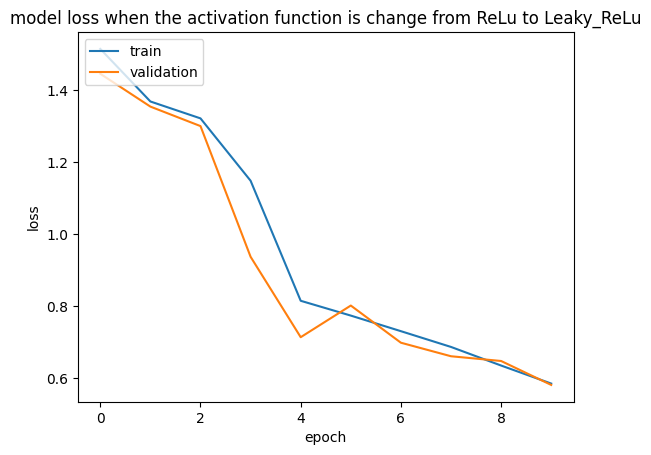

In [192]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss when the activation function is change from ReLu to Leaky_ReLu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

2. Increase hidden neurons

In [12]:
#model: this model is used to train on the transformed data
model1=keras.Sequential([keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",strides=(1,1),input_shape=(28,28,1),activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dense(56,activation='relu'),
                         keras.layers.Dense(10,activation='softmax')])

In [13]:
model1.compile(optimizer='SGD',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_images_flattened_transform,train_labels_categorial_transform,epochs=10,batch_size=20,validation_split=0.1)

Epoch 1/10
5400/5400 [==============================] - 258s 48ms/step - loss: 1.5269 - accuracy: 0.4214 - val_loss: 1.3950 - val_accuracy: 0.4616
Epoch 2/10
5400/5400 [==============================] - 250s 46ms/step - loss: 1.3772 - accuracy: 0.4871 - val_loss: 1.3626 - val_accuracy: 0.4870
Epoch 3/10
5400/5400 [==============================] - 249s 46ms/step - loss: 1.2996 - accuracy: 0.5328 - val_loss: 1.1479 - val_accuracy: 0.6188
Epoch 4/10
5400/5400 [==============================] - 252s 47ms/step - loss: 1.0989 - accuracy: 0.5972 - val_loss: 1.1054 - val_accuracy: 0.5676
Epoch 5/10
5400/5400 [==============================] - 250s 46ms/step - loss: 1.0056 - accuracy: 0.6350 - val_loss: 0.8654 - val_accuracy: 0.6930
Epoch 6/10
5400/5400 [==============================] - 245s 45ms/step - loss: 0.8519 - accuracy: 0.6772 - val_loss: 0.7092 - val_accuracy: 0.7398
Epoch 7/10
5400/5400 [==============================] - 249s 46ms/step - loss: 0.8205 - accuracy: 0.6984 - val_loss: 0

In [14]:
#model evaluation
model1.evaluate(test_images_flattened_transform,test_labels_categorial_transform)

625/625 [==============================] - 13s 21ms/step - loss: 1.0166 - accuracy: 0.6894


[1.0165661573410034, 0.6894000172615051]

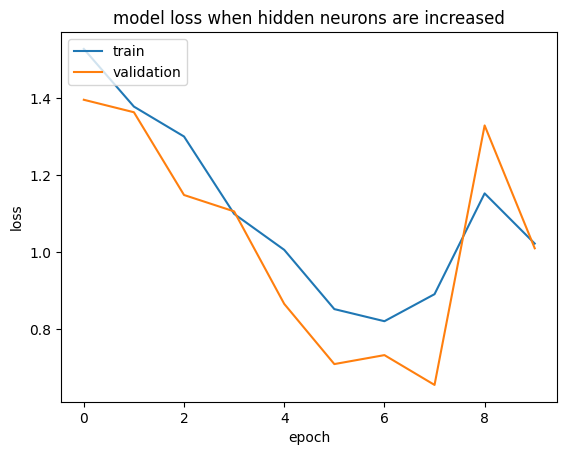

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss when hidden neurons are increased')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

3. Increase hidden layers

In [16]:
#model: this model is used to train on the transformed data
model1=keras.Sequential([keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",strides=(1,1),input_shape=(28,28,1),activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dense(56,activation='relu'),
                         keras.layers.Dense(10,activation='softmax')])

In [17]:
model1.compile(optimizer='SGD',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_images_flattened_transform,train_labels_categorial_transform,epochs=10,batch_size=20,validation_split=0.1)

Epoch 1/10
5400/5400 [==============================] - 241s 44ms/step - loss: 1.5594 - accuracy: 0.4105 - val_loss: 1.4114 - val_accuracy: 0.4552
Epoch 2/10
5400/5400 [==============================] - 233s 43ms/step - loss: 1.3636 - accuracy: 0.5028 - val_loss: 1.2644 - val_accuracy: 0.5128
Epoch 3/10
5400/5400 [==============================] - 243s 45ms/step - loss: 1.1053 - accuracy: 0.5845 - val_loss: 0.9569 - val_accuracy: 0.6247
Epoch 4/10
5400/5400 [==============================] - 278s 52ms/step - loss: 0.8192 - accuracy: 0.6831 - val_loss: 0.7007 - val_accuracy: 0.7371
Epoch 5/10
5400/5400 [==============================] - 237s 44ms/step - loss: 0.9041 - accuracy: 0.6710 - val_loss: 1.3690 - val_accuracy: 0.4698
Epoch 6/10
5400/5400 [==============================] - 228s 42ms/step - loss: 1.0662 - accuracy: 0.6138 - val_loss: 0.7191 - val_accuracy: 0.7347
Epoch 7/10
5400/5400 [==============================] - 231s 43ms/step - loss: 0.7651 - accuracy: 0.7124 - val_loss: 0

In [19]:
#model evaluation
model1.evaluate(test_images_flattened_transform,test_labels_categorial_transform)

625/625 [==============================] - 17s 27ms/step - loss: 0.6218 - accuracy: 0.7642


[0.6218299269676208, 0.76419997215271]

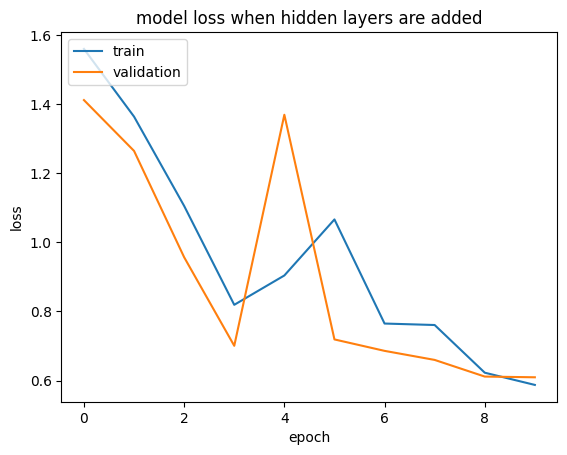

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss when hidden layers are added')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

4. Increase the number of epochs


In [26]:
#model1: this is the model trained on the scaled training dataset
model1=keras.Sequential([keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",strides=(1,1),input_shape=(28,28,1),activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dense(56,activation='relu'),
                         keras.layers.Dense(10,activation='softmax')])

In [28]:
model1.compile(optimizer='SGD',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_images_flattened_transform,train_labels_categorial_transform,epochs=12,batch_size=20,validation_split=0.1)

Epoch 1/12
5400/5400 [==============================] - 165s 30ms/step - loss: 1.3978 - accuracy: 0.4790 - val_loss: 1.3581 - val_accuracy: 0.4727
Epoch 2/12
5400/5400 [==============================] - 165s 31ms/step - loss: 1.3161 - accuracy: 0.5282 - val_loss: 1.2737 - val_accuracy: 0.5353
Epoch 3/12
5400/5400 [==============================] - 173s 32ms/step - loss: 1.0655 - accuracy: 0.6062 - val_loss: 0.9481 - val_accuracy: 0.6242
Epoch 4/12
5400/5400 [==============================] - 177s 33ms/step - loss: 0.8277 - accuracy: 0.6850 - val_loss: 1.0186 - val_accuracy: 0.6232
Epoch 5/12
5400/5400 [==============================] - 170s 31ms/step - loss: 0.6842 - accuracy: 0.7428 - val_loss: 0.6518 - val_accuracy: 0.7658
Epoch 6/12
5400/5400 [==============================] - 170s 31ms/step - loss: 0.9061 - accuracy: 0.6775 - val_loss: 0.8472 - val_accuracy: 0.7272
Epoch 7/12
5400/5400 [==============================] - 170s 32ms/step - loss: 0.8939 - accuracy: 0.6891 - val_loss: 0

In [29]:
#model evaluation
model1.evaluate(test_images_flattened_transform,test_labels_categorial_transform)

625/625 [==============================] - 9s 15ms/step - loss: 1.3283 - accuracy: 0.4915


[1.3282564878463745, 0.4914500117301941]

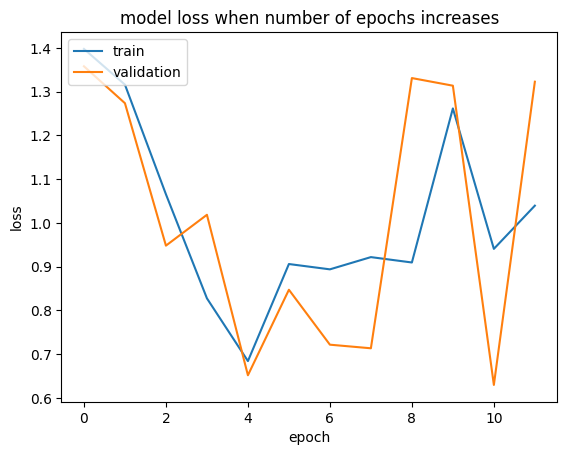

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss when number of epochs increases')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

5. Change optimizer

In [21]:
#model1: this is the model trained on the scaled training dataset
model1=keras.Sequential([keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",strides=(1,1),input_shape=(28,28,1),activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dense(56,activation='relu'),
                         keras.layers.Dense(10,activation='softmax')])

In [23]:
model1.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_images_flattened_transform,train_labels_categorial_transform,epochs=10,batch_size=20,validation_split=0.1)

Epoch 1/10
5400/5400 [==============================] - 211s 39ms/step - loss: 0.8228 - accuracy: 0.6899 - val_loss: 0.5072 - val_accuracy: 0.8125
Epoch 2/10
5400/5400 [==============================] - 174s 32ms/step - loss: 0.4729 - accuracy: 0.8218 - val_loss: 0.4321 - val_accuracy: 0.8407
Epoch 3/10
5400/5400 [==============================] - 178s 33ms/step - loss: 0.4060 - accuracy: 0.8473 - val_loss: 0.3906 - val_accuracy: 0.8564
Epoch 4/10
5400/5400 [==============================] - 175s 32ms/step - loss: 0.3634 - accuracy: 0.8636 - val_loss: 0.3795 - val_accuracy: 0.8590
Epoch 5/10
5400/5400 [==============================] - 176s 33ms/step - loss: 0.3329 - accuracy: 0.8746 - val_loss: 0.3635 - val_accuracy: 0.8668
Epoch 6/10
5400/5400 [==============================] - 187s 35ms/step - loss: 0.3069 - accuracy: 0.8844 - val_loss: 0.3527 - val_accuracy: 0.8699
Epoch 7/10
5400/5400 [==============================] - 200s 37ms/step - loss: 0.2857 - accuracy: 0.8925 - val_loss: 0

In [24]:
#model evaluation
model1.evaluate(test_images_flattened_transform,test_labels_categorial_transform)

625/625 [==============================] - 8s 12ms/step - loss: 0.3817 - accuracy: 0.8831


[0.38173556327819824, 0.8831499814987183]

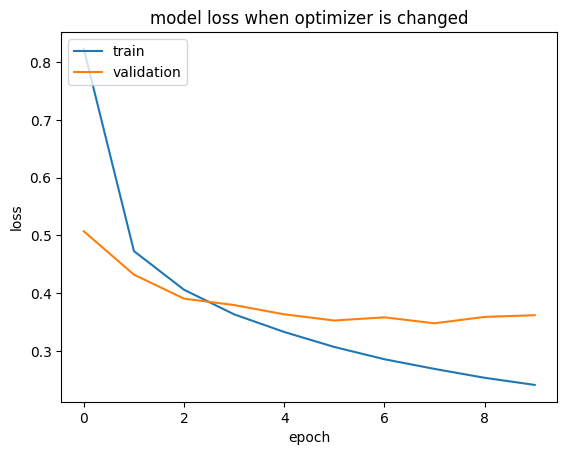

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss when optimizer is changed')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above observations, the change of optimiser from SGD to adam has increased acuracy from 82.44% to 88.31%. In the rest of the cases, the accuracy wasn't improved. But there is good accuracy observed when the activation functionwas changed and more hidden layers are been added. So, the final optimised model is designed below accordingly. Also, Batch Normalization layers are also added before the activation function for much better accuracy of model.


Final Model

In [34]:
#model1: this is the model trained on the scaled training dataset
model1=keras.Sequential([keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",strides=(1,1),input_shape=(28,28,1)),
                         keras.layers.BatchNormalization(),
                         keras.layers.Activation("leaky_relu"),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same'),
                         keras.layers.BatchNormalization(),
                         keras.layers.Activation("leaky_relu"),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same'),
                         keras.layers.BatchNormalization(),
                         keras.layers.Activation("leaky_relu"),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128,activation='leaky_relu'),
                         keras.layers.Dense(56,activation='leaky_relu'),
                         keras.layers.Dense(10,activation='softmax')])

In [35]:
model1.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
history=model1.fit(train_images_flattened_transform,train_labels_categorial_transform,epochs=15,batch_size=20,validation_split=0.1)

Epoch 1/15
5400/5400 [==============================] - 340s 62ms/step - loss: 1.0242 - accuracy: 0.6104 - val_loss: 1.0105 - val_accuracy: 0.6081
Epoch 2/15
5400/5400 [==============================] - 318s 59ms/step - loss: 0.5588 - accuracy: 0.7898 - val_loss: 0.5499 - val_accuracy: 0.7983
Epoch 3/15
5400/5400 [==============================] - 312s 58ms/step - loss: 0.4842 - accuracy: 0.8169 - val_loss: 0.4897 - val_accuracy: 0.8174
Epoch 4/15
5400/5400 [==============================] - 313s 58ms/step - loss: 0.4429 - accuracy: 0.8329 - val_loss: 0.4375 - val_accuracy: 0.8422
Epoch 5/15
5400/5400 [==============================] - 308s 57ms/step - loss: 0.4136 - accuracy: 0.8450 - val_loss: 0.4235 - val_accuracy: 0.8464
Epoch 6/15
5400/5400 [==============================] - 312s 58ms/step - loss: 0.3907 - accuracy: 0.8524 - val_loss: 0.4050 - val_accuracy: 0.8535
Epoch 7/15
5400/5400 [==============================] - 317s 59ms/step - loss: 0.3716 - accuracy: 0.8614 - val_loss: 0

In [36]:
#model evaluation
model1.evaluate(test_images_flattened_transform,test_labels_categorial_transform)

625/625 [==============================] - 15s 23ms/step - loss: 0.6587 - accuracy: 0.8183


[0.6586886048316956, 0.8182500004768372]

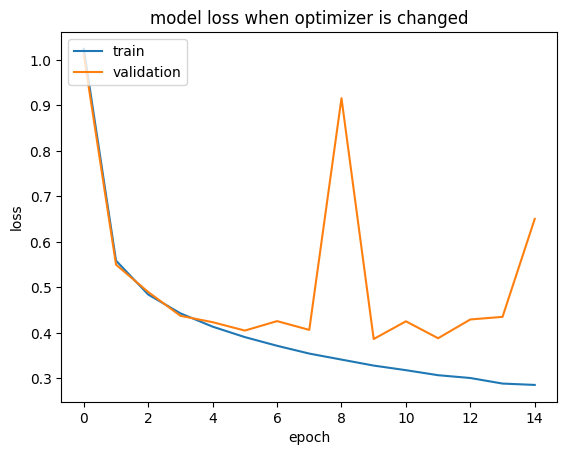

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss when optimizer is changed')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## **Saving optimised model**

In [38]:
# Save the model
model1.save('model-part2.keras')

Part 3: increase efficiency

In [39]:
#load the model
loaded_model = tf.keras.models.load_model('model-part2.keras')

print("Original Model Summary:")
print(loaded_model.summary())


Original Model Summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (

In [41]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [44]:
history=loaded_model.fit(train_images_flattened_transform,train_labels_categorial_transform, epochs=10,validation_split=0.1,callbacks=[model_checkpoint,reduce_lr,early_stopping])


Epoch 1/10
3375/3375 [==============================] - ETA: 0s - loss: 0.2654 - accuracy: 0.9006
Epoch 1: val_accuracy did not improve from 0.95733
3375/3375 [==============================] - 282s 83ms/step - loss: 0.2654 - accuracy: 0.9006 - val_loss: 0.1246 - val_accuracy: 0.9563 - lr: 0.0010
Epoch 2/10
3375/3375 [==============================] - ETA: 0s - loss: 0.2455 - accuracy: 0.9073
Epoch 2: val_accuracy improved from 0.95733 to 0.96817, saving model to best_model.h5
3375/3375 [==============================] - 283s 84ms/step - loss: 0.2455 - accuracy: 0.9073 - val_loss: 0.0986 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3375/3375 [==============================] - ETA: 0s - loss: 0.2391 - accuracy: 0.9103
Epoch 3: val_accuracy improved from 0.96817 to 0.96833, saving model to best_model.h5
3375/3375 [==============================] - 285s 85ms/step - loss: 0.2391 - accuracy: 0.9103 - val_loss: 0.1047 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 4/10
3375/3375 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.9123
Epoch 4: val_accuracy did not improve from 0.96833
3375/3375 [==============================] - 280s 83ms/step - loss: 0.2360 - accuracy: 0.9123 - val_loss: 0.1064 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 5/10
3375/3375 [==============================] - ETA: 0s - loss: 0.2265 - accuracy: 0.9149
Epoch 5: val_accuracy improved from 0.96833 to 0.97167, saving model to best_model.h5
3375/3375 [==============================] - 283s 84ms/step - loss: 0.2265 - accuracy: 0.9149 - val_loss: 0.1010 - val_accuracy: 0.9717 - lr: 0.0010
Epoch 6/10
3375/3375 [=========================

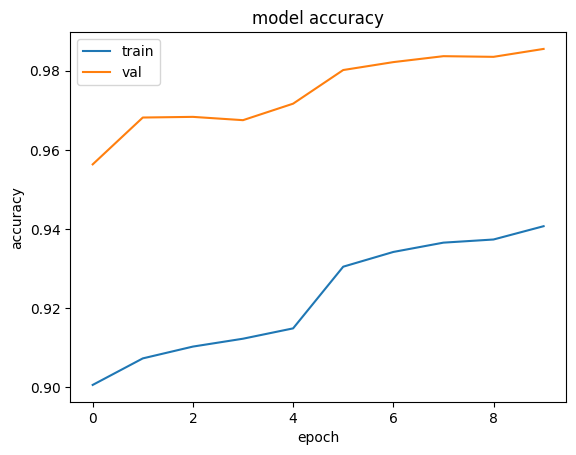

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [57]:
loaded_model.evaluate(test_images_flattened_transform,test_labels_categorial_transform)

625/625 [==============================] - 15s 24ms/step - loss: 0.4504 - accuracy: 0.8917


[0.450408011674881, 0.8917499780654907]

In [58]:
#accuracy of both the loaded_model and best_model
predictions1 = model1.predict(test_images_flattened_transform)
accuracy1 = accuracy_score(np.argmax(test_labels_categorial_transform, axis=1), np.argmax(predictions1, axis=1))

best_model = tf.keras.models.load_model('best_model.h5')
predictions2 = best_model.predict(test_images_flattened_transform)
accuracy2 = accuracy_score(np.argmax(test_labels_categorial_transform, axis=1), np.argmax(predictions2, axis=1))

print("Accuracy for Model 1:", accuracy1)
print("Accuracy for Model 2:", accuracy2)



625/625 [==============================] - 15s 23ms/step
Accuracy for Model 1: 0.81825
Accuracy for Model 2: 0.89175


In [53]:
y_pred=keras.models.load_model('best_model.h5').predict(test_images_flattened_transform)

625/625 [==============================] - 16s 25ms/step


Text(0.5, 0.98, 'Cloting Images Prediction')

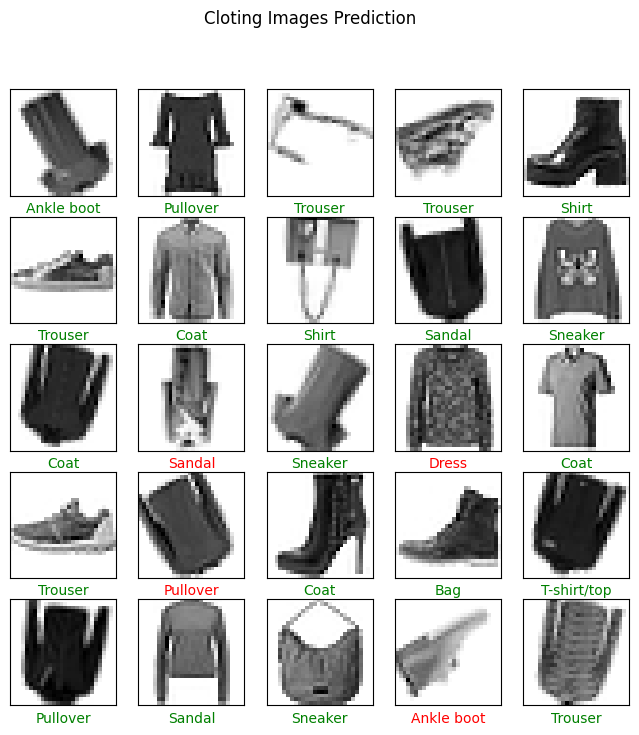

In [59]:
#ploting the first 25 images of test data
fig=plt.figure(figsize=(8,8))
for i in range(25):
  fig.add_subplot(5,5,i+1)
  plt.imshow(test_images_flattened_transform[i],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  true=classes[np.argmax(test_labels_categorial_transform[i])]
  predict=classes[np.argmax(y_pred[i])]
  if true==predict:#if the prediction is right then print the label in green else in red
    plt.xlabel(classes[test_labels[i]],color='green')
  else:
    plt.xlabel(classes[test_labels[i]],color='red')
fig.suptitle("Cloting Images Prediction")

Using techniques like batch normalization and hyperparameter tuning, the model accuracy was increased from 82.44% to 89.175%.
<ul>model with non-transformed data: 89.88%</ul>
<ul>model with transformed data: 89.175%</ul>